In [ ]:
# version : Ripser 1.1

In [2]:
#example 1) spiral
import time
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

import tadasets
from ripser import ripser
from persim import bottleneck

def dpoint2pointcloud(X, i, metric):

    ds = pairwise_distances(X, X[i, :][None, :], metric=metric).flatten()
    ds[i] = 0
    return ds

def get_nearby_perm(X, n_perm=None, distance_matrix=False, metric="euclidean"):
    
    if not n_perm:
        n_perm = X.shape[0]
    
    idx_perm = np.zeros(n_perm, dtype=np.int64)
    if distance_matrix:
        dpoint2all = lambda i: X[i, :]
    else:
        dpoint2all = lambda i: dpoint2pointcloud(X, i, metric)
    ds = np.zeros((n_perm, n_perm))
    ds = dpoint2all(0)
    dperm2all = [ds]
    
    for i in range(1, n_perm):
        dsn0 = np.nonzero(ds)
        dsn0 = dsn0[0]
        idx0 = np.argmin(ds[dsn0])
        idx = dsn0[idx0]
        idx_perm[i] = idx
        
        dperm2all.append(dpoint2all(idx))
        ds = np.where(ds == 0, 0, dperm2all[-1])
        
    dperm2all = np.array(dperm2all)
    return (idx_perm, dperm2all)

N = 2000
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t) * t
X[:, 1] = np.sin(t) * t

# 1. compute with original dataset
tic = time.time()
rep = ripser(X)
toc = time.time()
normal = toc-tic
dgms_full = rep['dgms']
print("nml: %.3g sec. gap: -.-- sec."%(normal))

# 2. use furthest point sampling
tic = time.time() 
res = ripser(X, n_perm=N)
toc = time.time()
fps = toc-tic
dgms_sub = res['dgms']
print("fps: %.3g sec. gap: %.3g sec."%(fps, normal-fps))
# the required time is shorten
# can the elapsed time be short if distance matrix is from greedy permutation?

# 3. use 'dm' from shuffle point
pwd = pairwise_distances(X)
a = np.random.permutation(N)
dm0 = pwd[:, a]
dm = dm0[a, :]
tic = time.time() 
res = ripser(dm, distance_matrix=True)
toc = time.time()
sfl = toc-tic
dgms_sfl = res['dgms']
print("sfl: %.3g sec. gap: %.3g sec."%(sfl, normal-sfl))
# random sample take a time shorter than original dataset too (look remark 1 : moving shuffle zone)
# then, why the original dataset need so long time?
# (the most shortly time is elapsed)

# 4. use 'dperm2all' from closest point sampling
idx_perm, dperm2all = get_nearby_perm(X)
cpsdm = dperm2all[:, idx_perm]
tic = time.time() 
res = ripser(cpsdm, distance_matrix=True)
toc = time.time()
cps = toc-tic
dgms_cps = res['dgms']
print("cps: %.3g sec. gap: %.3g sec."%(cps, normal-cps))
# the time lag is disappeared
# do it need a long time when points of the dataset that neighboring numbers is nearby?

bdist = bottleneck(dgms_full[0], dgms_sub[0])
print("fps) bottleneck distance: %.3g"%(bdist))
bdist = bottleneck(dgms_full[0], dgms_sfl[0])
print("sfl) bottleneck distance: %.3g"%(bdist))
bdist = bottleneck(dgms_full[0], dgms_cps[0])
print("cps) bottleneck distance: %.3g"%(bdist))
# check) has no bottleneck distance
# let's check another example

nml: 58 sec. gap: -.-- sec.
fps: 22.9 sec. gap: 35.2 sec.
sfl: 3.92 sec. gap: 54.1 sec.
cps: 60.5 sec. gap: -2.45 sec.
fps) bottleneck distance: 0
sfl) bottleneck distance: 0
cps) bottleneck distance: 0


In [2]:
#example 2) infty_sign 
import time
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

import tadasets
from ripser import ripser
from persim import bottleneck

def dpoint2pointcloud(X, i, metric):

    ds = pairwise_distances(X, X[i, :][None, :], metric=metric).flatten()
    ds[i] = 0
    return ds

def get_nearby_perm(X, n_perm=None, distance_matrix=False, metric="euclidean"):
    
    if not n_perm:
        n_perm = X.shape[0]
    
    idx_perm = np.zeros(n_perm, dtype=np.int64)
    
    if distance_matrix:
        dpoint2all = lambda i: X[i, :]
    else:
        dpoint2all = lambda i: dpoint2pointcloud(X, i, metric)
    ds = np.zeros((n_perm, n_perm))
    ds = dpoint2all(0)
    dperm2all = [ds]
    
    for i in range(1, n_perm):
        dsn0 = np.nonzero(ds)
        dsn0 = dsn0[0]
        idx0 = np.argmin(ds[dsn0])
        idx = dsn0[idx0]
        idx_perm[i] = idx
       
        dperm2all.append(dpoint2all(idx))
        ds = np.where(ds == 0, 0, dperm2all[-1])
        
    dperm2all = np.array(dperm2all)
    return (idx_perm, dperm2all)

N = 2000
X = tadasets.infty_sign(n=N, noise=0.1)

# 1. original datasets
tic = time.time()
rep = ripser(X)
toc = time.time()
normal = toc-tic
dgms_full = rep['dgms']
print("nml: %.3g sec. gap: -.-- sec."%(normal))

# 2. use furthest point sampling
tic = time.time() 
res = ripser(X, n_perm=N)
toc = time.time()
fps = toc-tic
dgms_sub = res['dgms']
print("fps: %.3g sec. gap: %.3g sec."%(fps, normal-fps))
# the required time is shorten too

# 3. use 'dm' from shuffle point
pwd = pairwise_distances(X)
a = np.random.permutation(N)
dm0 = pwd[:, a]
dm = dm0[a, :]
tic = time.time() 
res = ripser(dm, distance_matrix=True)
toc = time.time()
sfl = toc-tic
dgms_sfl = res['dgms']
print("sfl: %.3g sec. gap: %.3g sec."%(sfl, normal-sfl))
# the same result is happened as two unconnected circle
# as I had expected, if nearby, the time is long?

# 4. use 'dperm2all' from closest point sampling
idx_perm, dperm2all = get_nearby_perm(X)
cpsdm = dperm2all[:, idx_perm]
tic = time.time() 
res = ripser(cpsdm, distance_matrix=True)
toc = time.time()
cps = toc-tic
dgms_cps = res['dgms']
print("cps: %.3g sec. gap: %.3g sec."%(cps, normal-cps))
# the elapsed time is longer than shuffle and furthest point sampling
# but it is half time of computing original dataset.
# probably, there is other reasons...

for dim, (I1, I2) in enumerate(zip(dgms_full, dgms_sub)):
    bdist = bottleneck(I1, I2)
    print("fps) H%i bottleneck distance: %.3g"%(dim, bdist))
for dim, (I1, I2) in enumerate(zip(dgms_full, dgms_sfl)):
    bdist = bottleneck(I1, I2)
    print("sfl) H%i bottleneck distance: %.3g"%(dim, bdist))
for dim, (I1, I2) in enumerate(zip(dgms_full, dgms_cps)):
    bdist = bottleneck(I1, I2)
    print("cps) H%i bottleneck distance: %.3g"%(dim, bdist))
# check) has no bottleneck distance

nml: 27.1 sec. gap: -.-- sec.
fps: 5.62 sec. gap: 21.5 sec.
sfl: 5.36 sec. gap: 21.8 sec.
cps: 10.7 sec. gap: 16.4 sec.
fps) H0 bottleneck distance: 0
fps) H1 bottleneck distance: 0
sfl) H0 bottleneck distance: 0
sfl) H1 bottleneck distance: 0
cps) H0 bottleneck distance: 0
cps) H1 bottleneck distance: 0


In [9]:
# remark 1 : moving shuffle zone (use : infty_sign, without check bottleneck distance)
import time
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

import tadasets
from ripser import ripser
from persim import bottleneck

def dpoint2pointcloud(X, i, metric):

    ds = pairwise_distances(X, X[i, :][None, :], metric=metric).flatten()
    ds[i] = 0
    return ds

def get_nearby_perm(X, n_perm=None, distance_matrix=False, metric="euclidean"):
    
    if not n_perm:
        n_perm = X.shape[0]
    
    idx_perm = np.zeros(n_perm, dtype=np.int64)
    
    if distance_matrix:
        dpoint2all = lambda i: X[i, :]
    else:
        dpoint2all = lambda i: dpoint2pointcloud(X, i, metric)
    ds = np.zeros((n_perm, n_perm))
    ds = dpoint2all(0)
    dperm2all = [ds]
    
    for i in range(1, n_perm):
        dsn0 = np.nonzero(ds)
        dsn0 = dsn0[0]
        idx0 = np.argmin(ds[dsn0])
        idx = dsn0[idx0]
        idx_perm[i] = idx
       
        dperm2all.append(dpoint2all(idx))
        ds = np.where(ds == 0, 0, dperm2all[-1])
        
    dperm2all = np.array(dperm2all)
    return (idx_perm, dperm2all)

N = 2000
X = tadasets.infty_sign(n=N, noise=0.1)

# 1. original datasets
tic = time.time()
rep = ripser(X)
toc = time.time()
normal = toc-tic
dgms_full = rep['dgms']
print("nml: %.3g sec. gap: -.-- sec."%(normal))

# 2. use 'dm' from shuffle point (moving shuffle range)
for i in range(500, N+1, 500):
    pwd = pairwise_distances(X)
    a = np.random.permutation(i)
    dm0 = np.zeros((N, N))
    dm0 = pwd[0:i, a]
    dm[0:i, 0:i] = dm0[a, 0:i]
    dm[0:i, i:N] = pwd[a, i:N]
    dm[i:N, 0:i] = pwd[i:N, a]
    dm[i:N, i:N] = pwd[i:N, i:N]
    tic = time.time() 
    res = ripser(dm, distance_matrix=True)
    toc = time.time()
    sfl = toc-tic
    dgms_sfl = res['dgms']
    print("sfl: %.3g sec. gap: %.3g sec. (shuffle : %i points)"%(sfl, normal-sfl, i))
# the bigger shuffle range spread, the shorter time elapsed

nml: 28.9 sec. gap: -.-- sec.
sfl: 27.2 sec. gap: 1.67 sec. (shuffle : 500 points)
sfl: 27.3 sec. gap: 1.59 sec. (shuffle : 1000 points)
sfl: 18.7 sec. gap: 10.2 sec. (shuffle : 1500 points)
sfl: 5.41 sec. gap: 23.4 sec. (shuffle : 2000 points)


got perm = 
[ 0 29 28 27 26 25 24 23  7  6  5  2  1  4  3 21 22  8  9 11 10 12 13 14
 15 16 18 19 20 17]


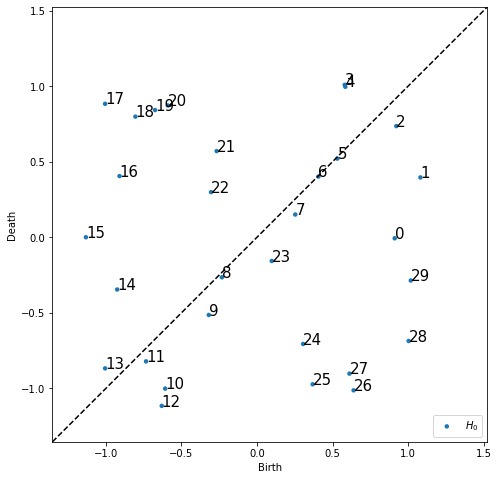

In [11]:
# remark 2 : what closest point sampling (use : infty_sign)
# closest point sampling is the sampling that points list from a near point in order
# please see below diagram and number of points
%matplotlib inline
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

import tadasets
import pandas as pd
import matplotlib.pyplot as plt
from persim import plot_diagrams

def dpoint2pointcloud(X, i, metric):

    ds = pairwise_distances(X, X[i, :][None, :], metric=metric).flatten()
    ds[i] = 0
    return ds

def get_nearby_perm(X, n_perm=None, distance_matrix=False, metric="euclidean"):
    
    if not n_perm:
        n_perm = X.shape[0]
    
    idx_perm = np.zeros(n_perm, dtype=np.int64)
    
    if distance_matrix:
        dpoint2all = lambda i: X[i, :]
    else:
        dpoint2all = lambda i: dpoint2pointcloud(X, i, metric)
    ds = np.zeros((n_perm, n_perm))
    ds = dpoint2all(0)
    dperm2all = [ds]
    
    for i in range(1, n_perm):
        dsn0 = np.nonzero(ds)
        dsn0 = dsn0[0]
        idx0 = np.argmin(ds[dsn0])
        idx = dsn0[idx0]
        idx_perm[i] = idx
       
        dperm2all.append(dpoint2all(idx))
        ds = np.where(ds == 0, 0, dperm2all[-1])
        
    dperm2all = np.array(dperm2all)
    return (idx_perm, dperm2all)

N = 30
X = tadasets.infty_sign(n=N, noise=0.1)

originaldm = pairwise_distances(X)
idx_perm, dperm2all = get_nearby_perm(X)
cpsdm = dperm2all[:, idx_perm]
print("got perm = \n{0}".format(idx_perm))
# got perm(idx_perm) is the closest point sampling

df = pd.DataFrame(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

plot_diagrams(X)
for k, v in df.iterrows():
    ax.annotate(k, xy=(v[0], v[1]), size=15)

plt.show()